# CareerFoundry Exercise 6.5 Unsupervised Machine Learning: Clustering

## 1. Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [40]:
import warnings
warnings.filterwarnings('ignore')

## 2. Loading data

In [41]:
path = r'C:\Users\rmr1q.000\Desktop\CareerFoundry\Section 6'
data = pd.read_csv(os.path.join(path, 'Basketball Data 2020-2023 CSV.csv'), encoding='unicode_escape')

In [42]:
data.shape

(2213, 36)

In [43]:
data.head()

,Rk,Player,Season,Pos,Age,Tm,G,GS,MP,FG,...,STL,BLK,TOV,PF,PTS,Player-additional,Salary,Height,Weight,Country
0,1,James Harden,2020,SG,30,HOU,68,68,2483,672,...,125,60,308,227,2335,hardeja01,38199000.0,195.58,99.790240,USA
1,2,Damian Lillard,2020,PG,29,POR,66,66,2474,624,...,70,22,194,114,1978,lillada01,29802321.0,190.50,88.450440,USA
2,3,Devin Booker,2020,SG,23,PHO,70,70,2512,627,...,49,18,264,213,1863,bookede01,27285000.0,198.12,93.439952,USA
3,4,Giannis Antetokounmpo,2020,PF,25,MIL,63,63,1917,685,...,61,66,230,195,1857,antetgi01,25842697.0,213.36,110.222856,Greece
4,5,Trae Young,2020,PG,21,ATL,60,60,2120,546,...,65,8,289,104,1778,youngtr01,6273000.0,187.96,81.646560,USA


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 2213 non-null   int64  
 1   Player             2213 non-null   object 
 2   Season             2213 non-null   int64  
 3   Pos                2213 non-null   object 
 4   Age                2213 non-null   int64  
 5   Tm                 2213 non-null   object 
 6   G                  2213 non-null   int64  
 7   GS                 2213 non-null   int64  
 8   MP                 2213 non-null   int64  
 9   FG                 2213 non-null   int64  
 10  FGA                2213 non-null   int64  
 11  FG%                2199 non-null   float64
 12  3P                 2213 non-null   int64  
 13  3PA                2213 non-null   int64  
 14  3P%                2107 non-null   float64
 15  2P                 2213 non-null   int64  
 16  2PA                2213 

In [45]:
#Removing categorical columns from the dataset

new_data = data.drop(columns=['Player', 'Pos', 'Tm', 'Player-additional', 'Country'])

In [46]:
#Confirming column drop

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      2213 non-null   int64  
 1   Season  2213 non-null   int64  
 2   Age     2213 non-null   int64  
 3   G       2213 non-null   int64  
 4   GS      2213 non-null   int64  
 5   MP      2213 non-null   int64  
 6   FG      2213 non-null   int64  
 7   FGA     2213 non-null   int64  
 8   FG%     2199 non-null   float64
 9   3P      2213 non-null   int64  
 10  3PA     2213 non-null   int64  
 11  3P%     2107 non-null   float64
 12  2P      2213 non-null   int64  
 13  2PA     2213 non-null   int64  
 14  2P%     2184 non-null   float64
 15  eFG%    2199 non-null   float64
 16  FT      2213 non-null   int64  
 17  FTA     2213 non-null   int64  
 18  FT%     2087 non-null   float64
 19  ORB     2213 non-null   int64  
 20  DRB     2213 non-null   int64  
 21  TRB     2213 non-null   int64  
 22  

In [47]:
#Checking the missing values

new_data.isnull().sum()

Rk          0
Season      0
Age         0
G           0
GS          0
MP          0
FG          0
FGA         0
FG%        14
3P          0
3PA         0
3P%       106
2P          0
2PA         0
2P%        29
eFG%       14
FT          0
FTA         0
FT%       126
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
Salary    247
Height    151
Weight    151
dtype: int64

In [48]:
median_values = new_data.median()

In [49]:
new_data = new_data.fillna(median_values)

In [50]:
new_data.isnull().sum()

Rk        0
Season    0
Age       0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Salary    0
Height    0
Weight    0
dtype: int64

No more missing values.

## 3. Using elbow technique

In [51]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [52]:
score = [kmeans[i].fit(new_data).score(new_data) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.863417027372731e+17,
 -4.398656188236164e+16,
 -1.7614032109619694e+16,
 -1.0938568975293832e+16,
 -7323301872235545.0,
 -5070805279477218.0,
 -3742916671109313.5,
 -2881251723031432.5,
 -2193487779877315.5]

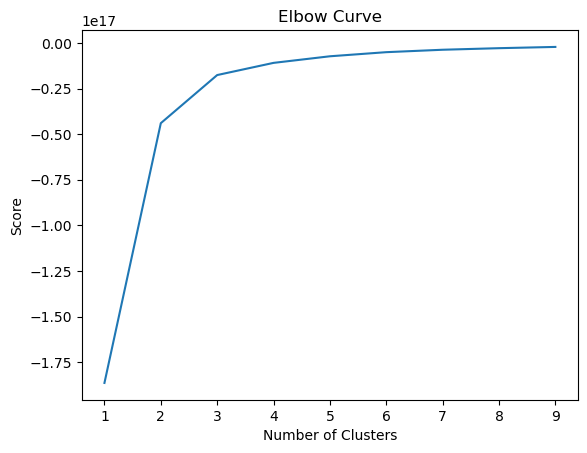

In [53]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Make a decision for how many clusters to use based on the chart

The optimal number of clusters appears to be 3.

## 5. Run the k-means algorithm

In [54]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [56]:
# Fit the k-means object to the data.

kmeans.fit(new_data)

KMeans(n_clusters=3)

## 6. Create new column for clusters

In [57]:
new_data['clusters'] = kmeans.fit_predict(new_data)

In [58]:
new_data.head(15)

,Rk,Season,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,Salary,Height,Weight,clusters
0,1,2020,30,68,68,2483,672,1514,0.444,299,...,512,125,60,308,227,2335,38199000.0,195.58,99.790240,1
1,2,2020,29,66,66,2474,624,1349,0.463,270,...,530,70,22,194,114,1978,29802321.0,190.50,88.450440,1
2,3,2020,23,70,70,2512,627,1283,0.489,141,...,456,49,18,264,213,1863,27285000.0,198.12,93.439952,1
3,4,2020,25,63,63,1917,685,1238,0.553,89,...,354,61,66,230,195,1857,25842697.0,213.36,110.222856,1
4,5,2020,21,60,60,2120,546,1249,0.437,205,...,560,65,8,289,104,1778,6273000.0,187.96,81.646560,2
5,6,2020,20,61,61,2047,581,1255,0.463,171,...,538,62,14,260,153,1759,7683360.0,200.66,98.883056,2
6,7,2020,26,57,57,2053,593,1303,0.455,170,...,347,71,23,194,126,1741,27093018.0,195.58,93.893544,1
7,8,2020,35,67,67,2316,643,1303,0.493,148,...,684,78,36,261,118,1698,37436858.0,205.74,113.398000,1
8,9,2020,23,69,69,2364,602,1342,0.449,173,...,294,70,14,184,172,1655,3635760.0,190.50,97.522280,2
9,10,2020,26,62,62,2131,551,1096,0.503,72,...,200,91,143,154,156,1618,27093019.0,210.82,114.758776,1


In [60]:
new_data['clusters'].value_counts()

clusters
2    1636
0     395
1     182
Name: count, dtype: int64

## 7. Creating visualizations of different variables

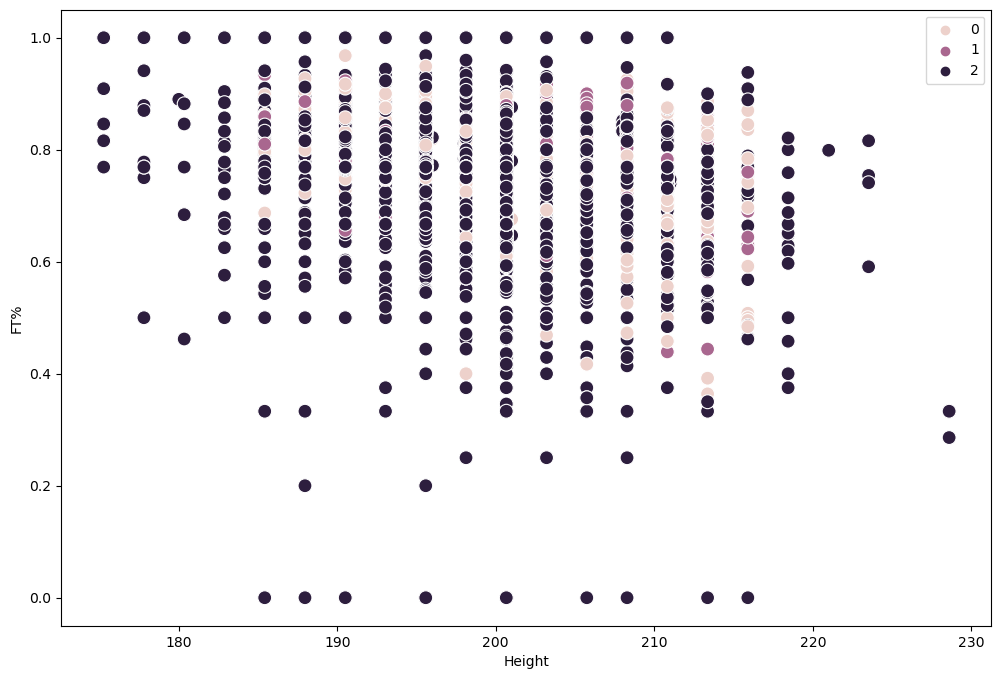

In [62]:
# Plot the clusters for the "FT%" and "Height" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=new_data['Height'], y=new_data['FT%'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Height') # Label x-axis.
plt.ylabel('FT%') # Label y-axis.
plt.show()

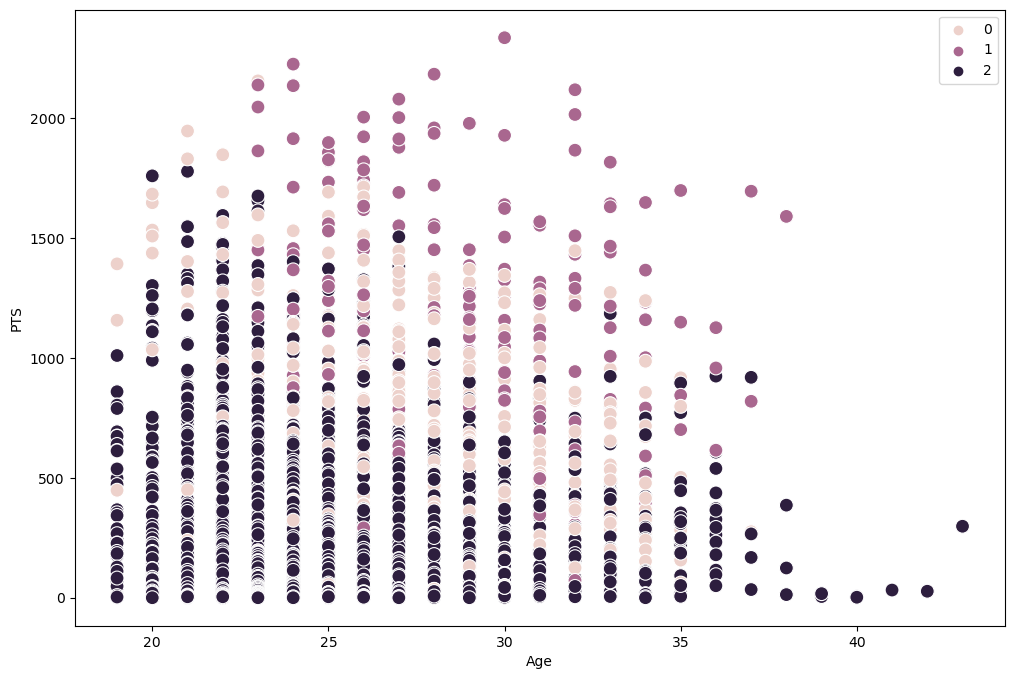

In [63]:
# Plot the clusters for the "FT%" and "Height" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=new_data['Age'], y=new_data['PTS'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Age') 
plt.ylabel('PTS') 
plt.show()

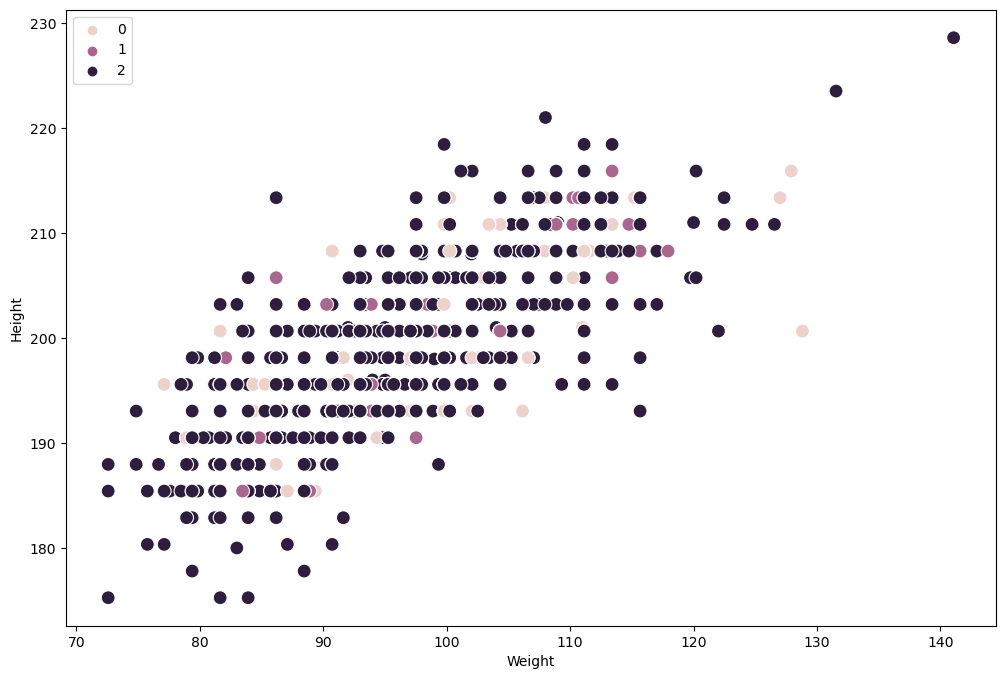

In [64]:
# Plot the clusters for the "FT%" and "Height" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=new_data['Weight'], y=new_data['Height'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

## 8. Discuss the different clusters

The clusters for the Height and FT% chart do not make a lot of sense to me. Cluster number 2 seems to be the vast majority of dots and accounts for all the maximum and minimum values of both variables. This cluster seems to take up the whole graph and also makes it hard to distinguish any pattern between the other 2 clusters.

The cluster for the Age and PTS chart makes a bit more sense than the first. The clusters appear to be influenced more on the amount of PTS that a player has but age does matter a little. THe older players with more points are in dark pink and the younger players or players with not a lot of points are in dark purple and the players in between are in light pink. This could actually be a very useful cluster to identify elite groups of players who have accomplished a lot in their careers.

The clusters for the Height and Weight chart do not make a lot of sense either. I predicted that the clusters would group the shorter and lighter players together along with a taller and larger group. The dark purple cluster seems to do the same thing as in the first graph where it includes the points for the lightest, heaviest, tallest, and shortest player. The other 2 clusters seem to be spread out evenly too without defining characteristics.

## 9. Calculate descriptive statistics of clusters

In [67]:
#Creating a new column for cluster statistics

new_data.loc[new_data['clusters'] == 2, 'cluster'] = 'dark purple'
new_data.loc[new_data['clusters'] == 1, 'cluster'] = 'purple'
new_data.loc[new_data['clusters'] == 0, 'cluster'] = 'pink'

In [68]:
new_data.groupby('cluster').agg({'Height':['mean', 'median'], 
                         'FT%':['mean', 'median'], 
                         'Age':['mean', 'median'],
                          'PTS':['mean', 'median'],
                           'Weight':['mean', 'median'],
                            'Height':['mean', 'median']})

Height               FT%               Age         \
                   mean  median      mean median       mean median   
cluster                                                              
dark purple  199.544205  200.66  0.740187  0.769  24.760391   24.0   
pink         201.227797  200.66  0.768197  0.786  27.779747   28.0   
purple       201.595055  203.20  0.807159  0.832  29.054945   29.0   

                     PTS             Weight             
                    mean  median       mean     median  
cluster                                                 
dark purple   318.027506   218.5  96.546632  97.068688  
pink          738.544304   687.0  98.131516  97.522280  
purple       1214.994505  1212.5  99.932299  99.790240

## 10. How can these results be resourceful

These results can be incredibly useful in helping to identify trends and patterns in the data that would go undiscovered otherwise. When the clusters group effectively they can help identify certain types of players which can then be broken down into groups and analyzed selectively. It would be possible to find other variables that different clusters have in common that could help make connections between 